In [1]:
import  time
import pandas as pd
import numpy as np
from multiprocessing import Pool
import math, os, shutil
from tqdm.auto import tqdm
import matplotlib.pyplot as plt
from scipy.io import readsav
import glob
import datetime, statistics
from aetherpy.io import read_routines
from math import cos, radians, sin, sqrt
from scipy import spatial, signal

import fnmatch

import geopandas
import geopandas
import sys

from scipy.interpolate import LinearNDInterpolator, interp1d

%matplotlib inline

/glade/work/abukowski/conda-envs/simstorm/lib/python3.11/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
from utility_programs.read_routines import SAMI
from utility_programs.filters import make_fits

## Settings

In [3]:
 data, times, = SAMI.read_sami_dene_tec('/glade/u/home/abukowski/scratch/GITM-simstorm-run1/sami-gitm-coupled/', datetime.datetime(2011,5,20))

In [4]:
glats = data['grid']['glat']
glons = data['grid']['glon']
tecs = data['data']['tec']

In [11]:
glats.shape, glons.shape, tecs.shape, len(times)

((80, 100, 100), (80, 100, 100), (625, 80, 100), 624)

In [12]:
times[0], times[-1]

(datetime.datetime(2011, 5, 20, 0, 0), datetime.datetime(2011, 5, 22, 3, 55))

In [17]:
glons[0,0,:], glons[0,:,0], glons[:,0,0]

(array([128.79805, 131.77005, 135.6612 , 140.93613, 148.37218, 159.2104 ,
        174.96318, 195.89217, 218.0202 , 236.0355 , 248.70709, 257.37872,
        263.4816 , 267.95258, 271.35742, 274.04236, 276.22345, 278.04233,
        279.5912 , 280.93793, 282.12323, 283.1798 , 284.13373, 284.9985 ,
        285.78958, 286.5163 , 287.18146, 287.79428, 288.3551 , 288.86365,
        289.32098, 289.73135, 290.0919 , 290.40222, 290.6632 , 290.8752 ,
        291.04013, 291.16016, 291.23676, 291.2736 , 291.27307, 291.2383 ,
        291.1726 , 291.07928, 290.96167, 290.82263, 290.6646 , 290.48975,
        290.30255, 290.1054 , 289.90057, 289.69   , 289.47498, 289.25806,
        289.03995, 288.82104, 288.60223, 288.38397, 288.1668 , 287.9513 ,
        287.73807, 287.5276 , 287.3203 , 287.11707, 286.91794, 286.72354,
        286.53436, 286.3509 , 286.17365, 286.00293, 285.83923, 285.68246,
        285.53278, 285.3916 , 285.25827, 285.13177, 285.0115 , 284.89697,
        284.78748, 284.68213, 284.5800

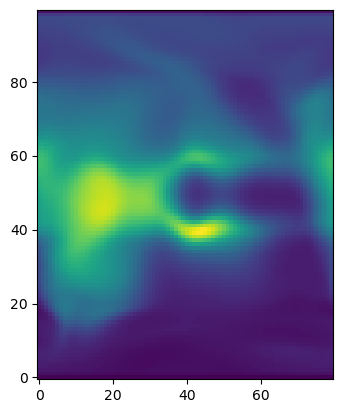

In [18]:
plt.imshow(tecs[450].T, origin = 'lower')

In [19]:
glat = []
glon = []
for lat in range(100):
    for lon in range(80):
        glon_i = glons[lon,0,lat]
        if glon_i > 180:
            glon.append(glon_i - 360)
        else:
            glon.append(glon_i)
        glat.append(glats[lon,0,lat])

In [20]:
len(glon)

8000

In [21]:
len(tecs[0].flatten())

8000

In [22]:
from utility_programs.filters import make_fits

In [23]:
fits = make_fits(tecs)

In [24]:
diffs = fits - tecs

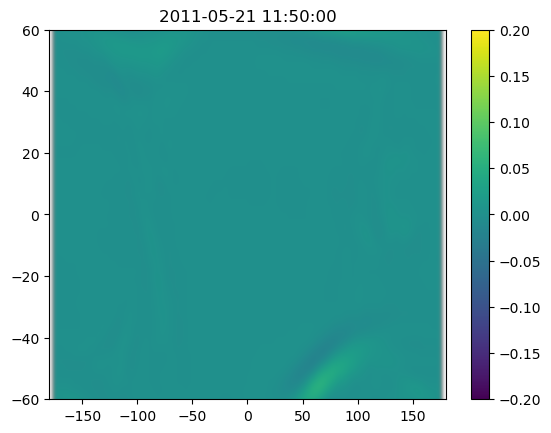

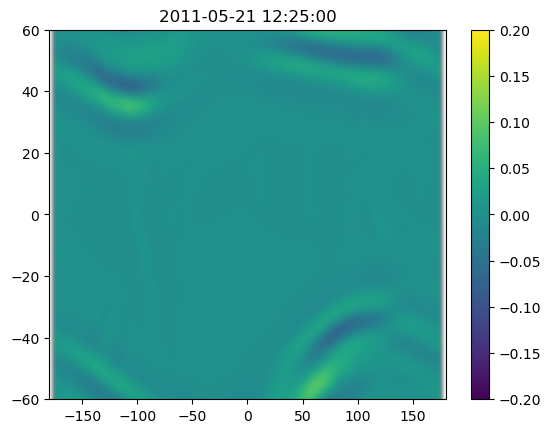

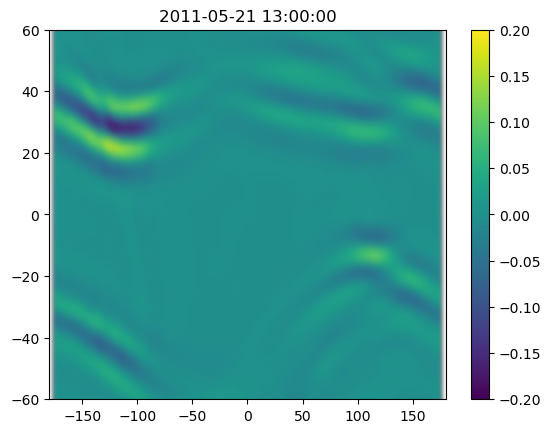

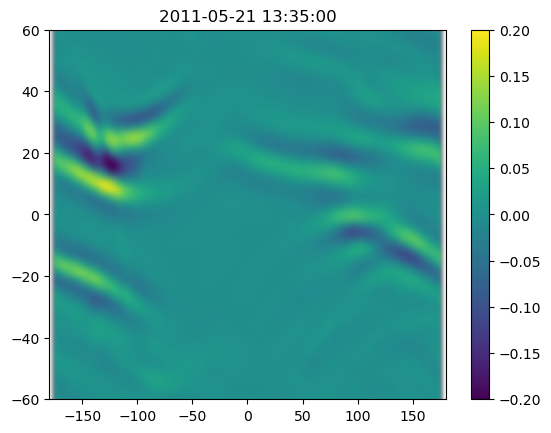

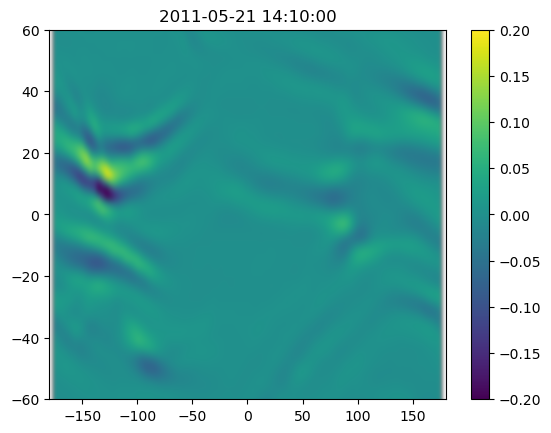

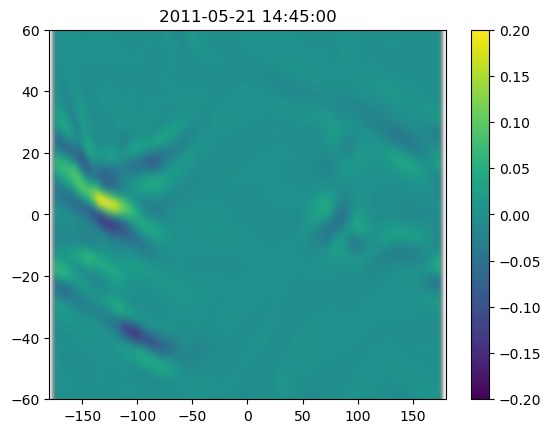

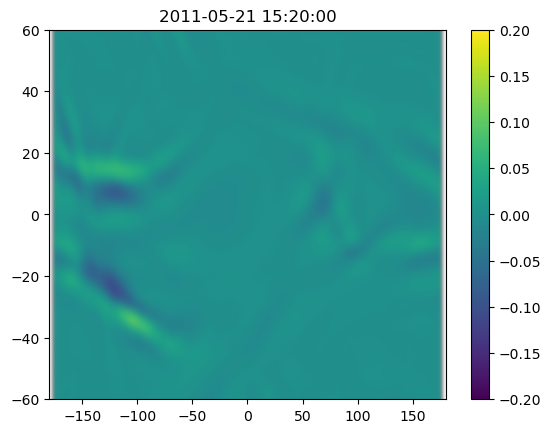

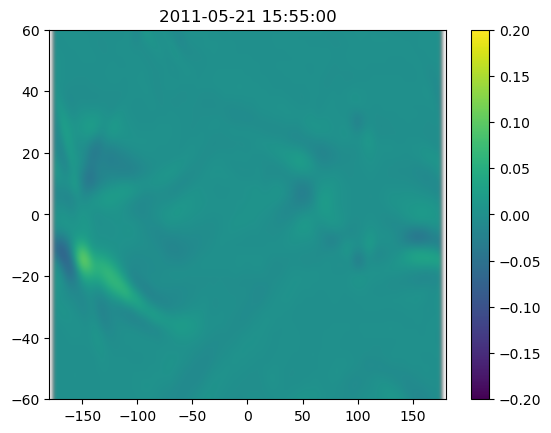

In [25]:
x = glon# (times - datetime.datetime(2011,5,21,12)) / pd.Timedelta(1,'hour')
nx = 100
y = glat
ny = 80



grid_x, grid_y = np.meshgrid(
    np.linspace(min(x), max(x), nx),
    np.linspace(min(y), max(y), ny))
loc_grid = list(zip(x, y))

p_extent = [min(x), max(x), min(y), max(y)]
v_min = -.2
vmax = .2

for t in range(430,481,7):
    
    c = diffs[t].T.flatten()
    
    interp = LinearNDInterpolator(loc_grid, c, rescale=True)

    znew = interp(list(zip(grid_x.flatten(), grid_y.flatten())))

    plt.imshow(znew.reshape(grid_x.shape), origin='lower', extent = p_extent, aspect = 'auto', interpolation_stage = 'rgba', interpolation='bicubic', vmin = v_min, vmax=vmax)
    plt.ylim(-60,60)
    plt.colorbar()
    plt.title(times[t])
    plt.show()
    plt.close()

In [26]:
vlon = -150

lon = np.argmin(np.abs(np.array(glon) - vlon))

In [27]:
glon[lon]

-150.0084991455078

In [28]:
sel_lons = np.where(np.abs(np.array(glon) - vlon) < 3)[0]

In [29]:
len(sel_lons)

120

In [30]:
tecs.shape

(625, 80, 100)

In [31]:
np.unravel_index(sel_lons, [80,100])

(array([ 7,  7,  7,  8,  8,  9, 10, 11, 11, 11, 12, 13, 13, 14, 15, 15, 15,
        16, 16, 17, 17, 18, 19, 19, 19, 20, 21, 22, 23, 23, 23, 23, 24, 25,
        26, 27, 27, 27, 28, 28, 29, 29, 30, 31, 31, 32, 33, 34, 35, 35, 35,
        36, 36, 37, 37, 38, 38, 39, 39, 39, 40, 41, 42, 43, 43, 44, 45, 46,
        47, 47, 47, 48, 48, 49, 49, 50, 50, 51, 51, 52, 53, 54, 55, 55, 56,
        56, 57, 57, 58, 58, 59, 59, 60, 61, 62, 63, 63, 63, 64, 64, 65, 66,
        66, 67, 68, 68, 69, 70, 70, 71, 71, 72, 73, 73, 74, 74, 75, 76, 77,
        77]),
 array([17, 18, 95, 73, 74, 52, 31, 10, 89, 90, 69, 48, 49, 28,  7,  8, 87,
        66, 67, 46, 47, 26,  6, 85, 86, 65, 45, 25,  4,  5, 84, 85, 64, 44,
        24,  4, 83, 84, 63, 64, 43, 44, 23,  3, 83, 63, 43, 23,  3, 82, 83,
        62, 63, 42, 43, 22, 23,  2,  3, 82, 62, 42, 22,  2, 82, 62, 42, 22,
         2, 81, 82, 61, 62, 41, 42, 21, 22,  1, 81, 61, 41, 21,  1, 81, 60,
        61, 40, 41, 20, 21,  0, 80, 60, 40, 20,  0, 79, 80, 59, 60, 39, 19

In [32]:
tecs.shape

(625, 80, 100)

In [33]:
i1,i2 = np.unravel_index(sel_lons, [100,80])

In [34]:
i1.shape, i2.shape

((120,), (120,))

In [35]:
np.array(glat)[sel_lons]

array([-81.63437   , -82.83312   , -78.48884   , -75.15292   ,
       -76.302795  , -72.84842   , -70.46217   , -68.023735  ,
       -65.55476   , -66.62177   , -64.107506  , -61.590122  ,
       -62.62622   , -60.07957   , -57.5379    , -58.540127  ,
       -55.979206  , -53.432404  , -54.39865   , -51.84018   ,
       -52.798176  , -50.2311    , -48.607048  , -46.059597  ,
       -46.969357  , -44.42124   , -42.772636  , -41.115494  ,
       -38.60579   , -39.450283  , -36.94754   , -37.77824   ,
       -35.28375   , -33.61474   , -31.941364  , -30.264502  ,
       -27.845816  , -28.583635  , -26.177603  , -26.899197  ,
       -24.506588  , -25.211504  , -22.832127  , -21.153978  ,
       -19.472126  , -17.787312  , -16.099213  , -14.407378  ,
       -12.71163   , -10.458666  , -11.011971  ,  -8.767578  ,
        -9.309147  ,  -7.0713167 ,  -7.602898  ,  -5.3703604 ,
        -5.8926487 ,  -3.6635818 ,  -4.178128  ,  -1.9508238 ,
        -0.23078957,   1.4962083 ,   3.2303622 ,   4.97

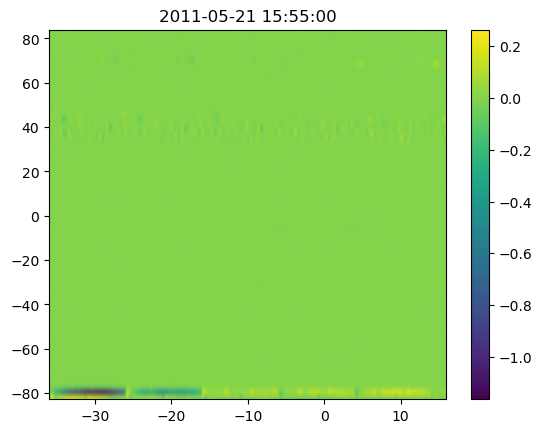

In [67]:
x = (times - datetime.datetime(2011,5,21,12)) / pd.Timedelta(1,'hour')
nx = 600
y = np.array(glat)[sel_lons]
ny = 80

in_x, in_y = np.meshgrid(
    x,y)

out_x, out_y = np.meshgrid(
    np.linspace(min(x), max(x), nx),
    np.linspace(min(y), max(y), ny))
# loc_grid = list(zip(grid_x, grid_y))

p_extent = [min(x), max(x), min(y), max(y)]
# v_min = -.2
# vmax = .2
c = diffs[1:,i2, i1].flatten()
    
interp = LinearNDInterpolator(np.array([in_x.flatten(), in_y.flatten()]).T, c, rescale=True)

znew = interp(list(zip(out_x.flatten(), out_y.flatten())))

plt.imshow(znew.reshape(out_x.shape), origin='lower', extent = p_extent, aspect = 'auto', interpolation_stage = 'rgba', interpolation='bicubic') #, vmin = v_min, vmax=vmax)
plt.colorbar()
plt.title(times[t])
plt.show()
plt.close()

In [71]:
lon_target = -150

In [72]:
sel_pts = np.where((np.abs(np.array(glon) - lon_target) < 3) & (np.abs(glat) <65) )[0]

In [73]:
len(sel_pts)

96

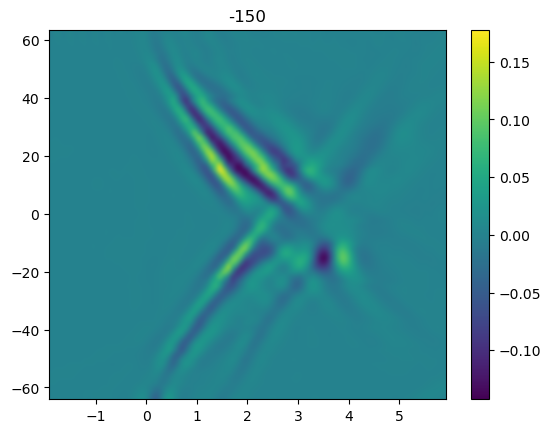

In [95]:
x = []
zs = []

for i, t in enumerate(times):
    if t > datetime.datetime(2011,5,21,10) and t < datetime.datetime(2011,5,21,18):
        x.append((t - datetime.datetime(2011,5,21,12)) / pd.Timedelta(1,'hour'))
        zs.append(diffs[i,:,:].T.flatten()[sel_pts])
        
        
zs = np.array(zs).T.flatten()
nx = len(x)-1
y = np.array(glat)[sel_pts]
ny = 80

in_x, in_y = np.meshgrid(
    x,y)

out_x, out_y = np.meshgrid(
    np.linspace(min(x), max(x), nx),
    np.linspace(min(y), max(y), ny))

p_extent = [min(x), max(x), min(y), max(y)]


    
interp = LinearNDInterpolator(np.array([in_x.flatten(), in_y.flatten()]).T, zs, rescale=True)
znew = interp(list(zip(out_x.flatten(), out_y.flatten())))

plt.imshow(znew.reshape(out_x.shape), origin='lower', extent = p_extent, aspect = 'auto', interpolation_stage = 'rgba', interpolation='bicubic') #, vmin = v_min, vmax=vmax)
plt.colorbar()
plt.title(lon_target)
plt.show()
plt.close()


In [82]:
np.array([in_x.flatten(), in_y.flatten()]).shape, zs.shape

((2, 59904), (624, 96))

In [91]:
len(x)

95

In [96]:
import argparse
import datetime
# import gc
from utility_programs.read_routines import SAMI
import os
import time
# from multiprocessing import Pool

import geopandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import signal
from tqdm.auto import tqdm

import scipy.integrate as integ

from utility_programs.plot_help import UT_from_Storm_onset
from utility_programs import plotting_routines
from utility_programs import filters


In [98]:

world = geopandas.read_file(
        geopandas.datasets.get_path('naturalearth_lowres'))

# Lon to keo:

sami_keo_lons = [-180,-90,0,90]

global lat_lim
lat_lim = 65



global dtime_storm_start
dtime_storm_start = datetime.datetime(2011,5,21,12)

global dtime_sim_start
dtime_sim_start = datetime.datetime(2011,5,20)

print('reading data...')


reading data...


In [100]:
sami_data, times = SAMI.read_sami_dene_tec("/glade/u/home/abukowski/scratch/GITM-simstorm-run1/sami-gitm-coupled/",
                                           dtime_sim_start, reshape=True)


In [101]:
TWO_FILES = False

global glats, glons
glats = []
glons = []
nlons = sami_data['grid']['glon'].shape[0]
nlats = sami_data['grid']['glat'].shape[2]
for lat in range(nlats):
    for lon in range(nlons):
        glon_i = sami_data['grid']['glon'][lon,0,lat]
        if glon_i > 180:
            glons.append(glon_i - 360)
        else:
            glons.append(glon_i)
        glats.append(sami_data['grid']['glat'][lon,0,lat])

glons = np.array(glons)
glats = np.array(glats)

In [102]:
glons.shape, glats.shape

((8000,), (8000,))

In [103]:

global hrs_since_storm_onset
hrs_full = [(i - pd.Timestamp(dtime_storm_start))
            / pd.Timedelta('1 hour') for i in times]

ins = []
hrs_since_storm_onset = []
t_start = dtime_storm_start - datetime.timedelta(hours= 2)
t_end = dtime_storm_start + datetime.timedelta(hours=8)
new_times = []
for index, t in enumerate(times):
    if t > t_start and t < t_end:
        ins.append(index)
        new_times.append(t)
        hrs_since_storm_onset.append((pd.Timestamp(t) -
                                       dtime_storm_start)/
                                     pd.Timedelta(1, 'hour'))
times = new_times

In [104]:
len(times)

119

In [107]:

print("Calculating fits....")
global fits_sami
sami_tec = sami_data['data']["tec"][ins].reshape(
    [len(times), nlons, nlats])

fits_sami = filters.make_fits(sami_tec)

Calculating fits....


In [108]:
print('Done! Shape of TEC data: ', sami_tec.shape,
    '\nLaunching plotting routine now.')
nlons, nlats

Done! Shape of TEC data:  (119, 80, 100) 
Launching plotting routine now.


(80, 100)

In [110]:
plot_types = ['raw','diff']

cbar_lims_dict = {
    'TWO_FILES': {
        'raw': [-5, 5], 'fit': [-5, 5], 'diff': [-5, 5]},
    'ONE_FILE': {
        'raw': [0, 70], 'fit': [0, 70], 'diff': [-.2, .2]}}

In [114]:
fname = '',
OVERWRITE = None



Making keograms:   0%|          | 0/8 [00:17<?, ?it/s]


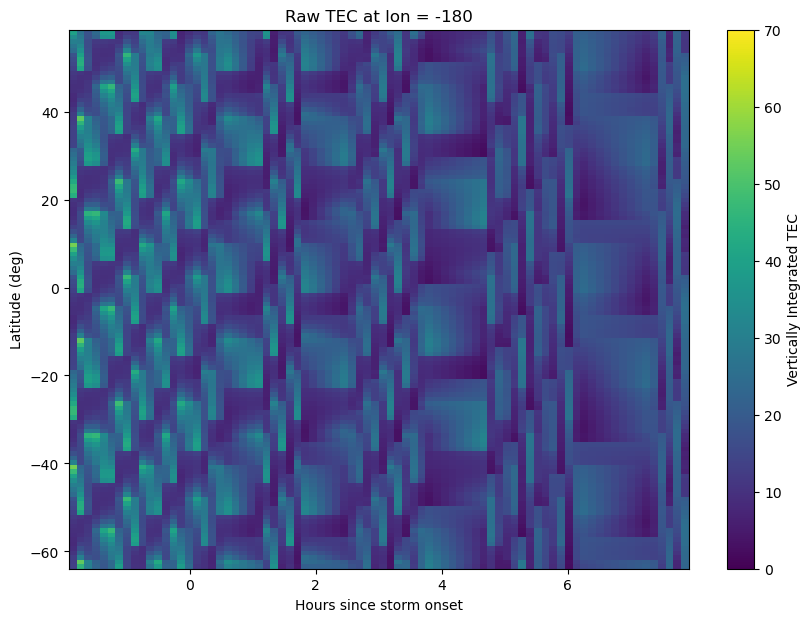



Making keograms:  12%|█▎        | 1/8 [00:00<00:03,  2.33it/s]

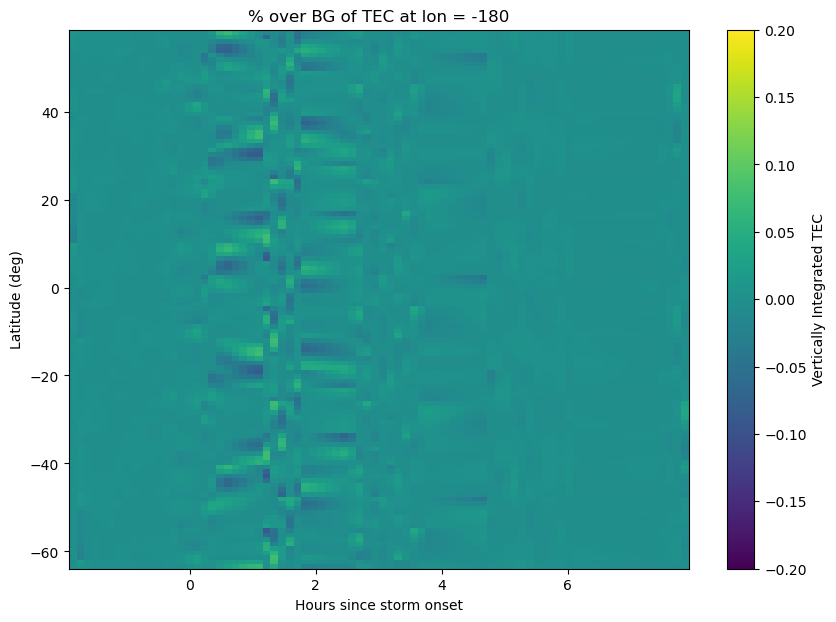



Making keograms:  25%|██▌       | 2/8 [00:00<00:02,  2.58it/s]

In [116]:

pbar = tqdm(total=len(sami_keo_lons) * len(plot_types),
            desc="Making keograms")
for real_lon in sami_keo_lons:

    sel_pts = np.where(
        (np.abs(glons - real_lon) < 3) &
        (np.abs(glats) < lat_lim) )[0]

    raw = []
    fit = []
    for t in range(len(times)):
        raw.append(
            sami_tec[t,:,:].copy().T.flatten()[sel_pts])
        fit.append(
            fits_sami[t,:,:].copy().T.flatten()[sel_pts])
    raw = np.array(raw)
    fit = np.array(fit)

    if TWO_FILES:
        raw2 = []
        fit2 = []
        for t in range(len(times)):
            raw2.append(
                sami_tec2[t,:,:].copy().T.flatten()[sel_pts])
            fit2.append(
                fits_sami2[t,:,:].copy().T.flatten()[sel_pts])

    for plot_type in plot_types:
        if plot_type == 'raw':
            tec = raw.copy()
            if TWO_FILES:
                tec -= raw2
                title = "Diff of Raw TEC at lon = {}".format(real_lon)
                cbar_lims = cbar_lims_dict['TWO_FILES']['raw']
            else:
                title = "Raw TEC at lon = {}".format(real_lon)
                cbar_lims = cbar_lims_dict['ONE_FILE']['raw']

            data, extent = plotting_routines.interpolate_2d_plot(
                hrs_since_storm_onset, glats[sel_pts], tec, 
                len(hrs_since_storm_onset), 80)

            plotting_routines.make_a_keo(data, title, cbar_lims,
                       cbar_name='Vertically Integrated TEC',
                       OVERWRITE=OVERWRITE,
                       extent = extent, save_or_show='show')
            pbar.update()

        if plot_type == 'fit':
            tec = fit.copy()
            if TWO_FILES:
                tec -= fit2
                title = "Diff of Fit TEC at lon = {}".format(real_lon)
                cbar_lims = cbar_lims_dict['TWO_FILES']['fit']
            else:
                title = "Fit TEC at lon = {}".format(real_lon)
                cbar_lims = cbar_lims_dict['ONE_FILE']['fit']



            data, extent = plotting_routines.interpolate_2d_plot(
                hrs_since_storm_onset, glats[sel_pts], tec, 
                len(hrs_since_storm_onset), 80)

            plotting_routines.make_a_keo(data, title, cbar_lims,
                       cbar_name='Vertically Integrated TEC',
                       OVERWRITE=OVERWRITE,
                       extent = extent, save_or_show='show')
            pbar.update()

        if plot_type == 'diff':
            tec = raw.copy() - fit.copy()
            if TWO_FILES:
                tec -= (100*(raw2.copy() - fit2.copy()) 
                            / raw2.copy())
                title = "Diff of % over BG of TEC at lon = {}".format(
                    real_lon)
                cbar_lims = cbar_lims_dict['TWO_FILES']['diff']
            else:
                title = "% over BG of TEC at lon = {}".format(
                    real_lon)
                cbar_lims = cbar_lims_dict['ONE_FILE']['diff']

            data, extent = plotting_routines.interpolate_2d_plot(
                hrs_since_storm_onset, glats[sel_pts], tec, 
                len(hrs_since_storm_onset), 80)

            plotting_routines.make_a_keo(data, title, cbar_lims,
                       cbar_name='Vertically Integrated TEC',
                       OVERWRITE=OVERWRITE,
                       extent = extent, save_or_show='show')
            pbar.update()
    break

In [117]:
tec.shape

(119, 49)

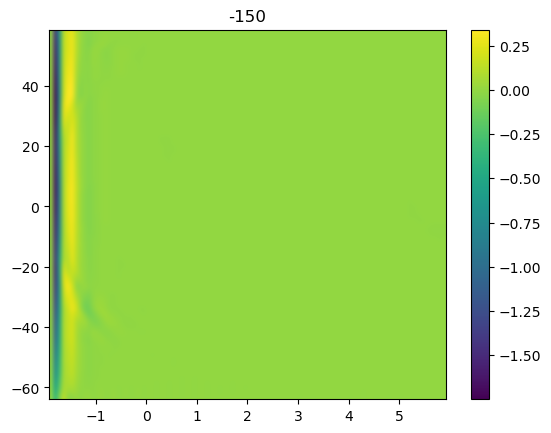

In [129]:
x = []
zs = []

for i, t in enumerate(times):
    if t > datetime.datetime(2011,5,21,10) and t < datetime.datetime(2011,5,21,18):
        x.append((t - datetime.datetime(2011,5,21,12)) / pd.Timedelta(1,'hour'))
        zs.append(diffs[i,:,:].T.flatten()[sel_pts])
        
        
zs = np.array(zs).T.flatten()
nx = len(x)-1
y = np.array(glat)[sel_pts]
ny = 80

in_x, in_y = np.meshgrid(
    x,y)

out_x, out_y = np.meshgrid(
    np.linspace(min(x), max(x), nx),
    np.linspace(min(y), max(y), ny))

p_extent = [min(x), max(x), min(y), max(y)]


    
interp = LinearNDInterpolator(np.array([in_x.flatten(), in_y.flatten()]).T, zs, rescale=True)
znew = interp(list(zip(out_x.flatten(), out_y.flatten())))

plt.imshow(znew.reshape(out_x.shape), origin='lower', extent = p_extent, aspect = 'auto', interpolation_stage = 'rgba', interpolation='bicubic') #, vmin = v_min, vmax=vmax)
plt.colorbar()
plt.title(lon_target)
plt.show()
plt.close()


In [155]:
x = hrs_since_storm_onset
y = glats[sel_pts]
c = tec
nx_out = 110
ny_out = 60


In [156]:
tec.shape

(119, 49)

In [158]:
in_x, in_y = np.meshgrid(x,y)
    
out_x, out_y = np.meshgrid(
    np.linspace(min(x), max(x), nx_out),
    np.linspace(min(y), max(y), ny_out))


interp = LinearNDInterpolator(
    np.array([in_x.flatten(), in_y.flatten()]).T, c.T.flatten(),
    rescale=True)
znew = interp(list(zip(out_x.flatten(), out_y.flatten())))
znew = znew.reshape(out_x.shape)

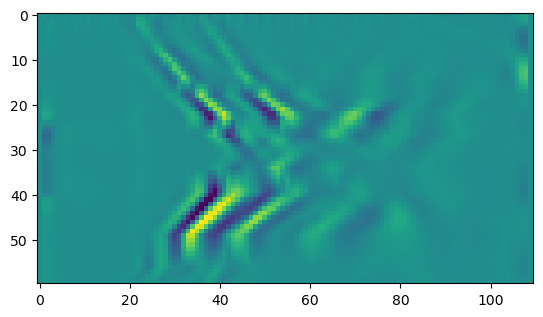

In [159]:
plt.imshow(znew)

In [138]:
len(in_x[0]), len(in_y[0])

(119, 119)

In [141]:
len(in_x.flatten()), len(in_y.flatten())

(5831, 5831)

In [143]:
len(x), len(y), len(x)* len(y), 

(119, 49, 5831)

In [ ]:
x = []
zs = []

for i, t in enumerate(times):
    if t > datetime.datetime(2011,5,21,10) and t < datetime.datetime(2011,5,21,18):
        x.append((t - datetime.datetime(2011,5,21,12)) / pd.Timedelta(1,'hour'))
        zs.append(diffs[i,:,:].T.flatten()[sel_pts])
        
        
zs = np.array(zs).T.flatten()
nx = len(x)-1
y = np.array(glat)[sel_pts]
ny = 80

in_x, in_y = np.meshgrid(
    x,y)

out_x, out_y = np.meshgrid(
    np.linspace(min(x), max(x), nx),
    np.linspace(min(y), max(y), ny))

p_extent = [min(x), max(x), min(y), max(y)]


    
interp = LinearNDInterpolator(np.array([in_x.flatten(), in_y.flatten()]).T, zs, rescale=True)
znew = interp(list(zip(out_x.flatten(), out_y.flatten())))

plt.imshow(znew.reshape(out_x.shape), origin='lower', extent = p_extent, aspect = 'auto', interpolation_stage = 'rgba', interpolation='bicubic') #, vmin = v_min, vmax=vmax)
plt.colorbar()
plt.title(lon_target)
plt.show()
plt.close()

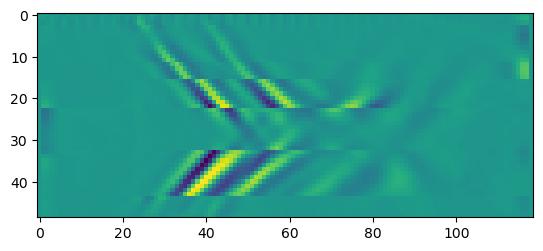

In [120]:
plt.imshow(tec.T)

In [61]:
in_x.shape, in_y.shape, c.shape

((120, 624), (120, 624), (74880,))

In [62]:
np.product(in_x.shape), np.product(in_y.shape), np.product(c.shape)

(74880, 74880, 74880)

In [63]:
grid_y.shape

(120, 624)

In [64]:
c.shape

(74880,)

In [65]:
x = (times - datetime.datetime(2011,5,21,12)) / pd.Timedelta(1,'hour')
nx = 600
y = glat
ny = 80



points = np.vstack((np.array(x),np.array(y))).T

grid_x,grid_y = np.meshgrid(np.linspace(min(x),max(x),nx),np.linspace(min(y),max(y),ny))

fitted_values = griddata(points, color, (grid_x,grid_y))
plt.pcolormesh(grid_x,grid_y,fitted_values)


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 624 and the array at index 1 has size 8000

In [49]:
grid_x.shape

(120, 624)

In [50]:
grid_y.shape

(120, 624)

In [51]:
c.shape

(74880,)

In [52]:
np.product(grid_x.shape)

74880

In [53]:
len(loc_grid)

8000

In [54]:
len(loc_grid[0][0])

TypeError: object of type 'numpy.float32' has no len()

In [55]:
len(loc_grid), len(tecs[510])

(8000, 80)

In [56]:
def interp_one_map(x, y, c, ):

    xmin = min(x)
    xmax = max(x)
    ymin = min(y)
    ymax = max(y)

    grid_x,grid_y = np.meshgrid(np.linspace(xmin,xmax,nlons),np.linspace(ymin,ymax,nlats))
    loc_grid = list(zip(x, y))
    interp = LinearNDInterpolator(loc_grid , c, rescale = True)

    znew = interp(list(zip(grid_x.flatten(), grid_y.flatten())))
    return grid_x, grid_y, znew.reshape(nlons,nlats)

In [5]:
sami_data.keys()

dict_keys(['grid', 'data'])

In [4]:
nlats = 66
nlons = 91
target_alt = 300
percent_thresh = .04
lat_lim = 65
nt = 9

In [5]:
times[nt]

datetime.datetime(2011, 5, 21, 11, 45)

In [6]:
p_mask = (np.abs(sami_data['grid']['alt'].flatten() - target_alt) <= (target_alt*percent_thresh)) & (np.abs(sami_data['grid']['glat'].flatten()) - lat_lim < 0)
target_alt*percent_thresh, np.sum(p_mask), np.product(sami_data['grid']['alt'].shape), sami_data['data']['edens'].shape

(12.0, 22646, 1474560, (80, 72, 256, 24))

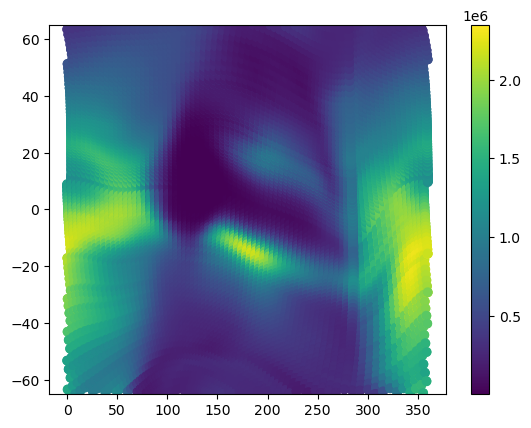

In [7]:
plt.scatter(sami_data['grid']['glon'].flatten()[p_mask],
           sami_data['grid']['glat'].flatten()[p_mask],
           c = sami_data['data']['edens'][:,:,:,nt].flatten()[p_mask], )
plt.ylim(-65,65)
plt.colorbar()
plt.show()
plt.close()

In [9]:
ox, oy, z = interp_one_map(sami_data['grid']['glon'].flatten()[p_mask],
           sami_data['grid']['glat'].flatten()[p_mask],
           c = sami_data['data']['edens'][:,:,:,nt].flatten()[p_mask])

NameError: name 'interp_one_map' is not defined

In [10]:
plt.scatter(ox, oy, c = z)
plt.colorbar()
plt.show()
plt.close()

NameError: name 'ox' is not defined

In [21]:
# plt.scatter(sami_data['grid']['glon'].flatten()[p_mask],
#            sami_data['grid']['glat'].flatten()[p_mask],
#            c = sami_data['data']['edens'][:,:,:,nt].flatten()[p_mask]
#            - sami_data['data']['edens'][:,:,:,nt+1].flatten()[p_mask])
# plt.ylim(-65,65)
# plt.colorbar()
# plt.show()
# plt.close()

In [36]:
import importlib

In [77]:
importlib.reload(SAMI)

<module 'utility_programs.read_routines.SAMI' from '/glade/u/home/abukowski/SAMI3-GITM-python/utility_programs/read_routines/SAMI.py'>

In [111]:
f, tectimes = SAMI.read_sami_dene_tec('/glade/u/home/abukowski/scratch/GITM-simstorm-run2/sami-gitm-coupled/', reshape = True)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/glade/work/abukowski/conda-envs/simstorm/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/glade/scratch/abukowski/ipykernel_46910/3695847112.py", line 1, in <module>
    f, tectimes = SAMI.read_sami_dene_tec('/glade/u/home/abukowski/scratch/GITM-simstorm-run2/sami-gitm-coupled/', reshape = True)
                  ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/glade/u/home/abukowski/SAMI3-GITM-python/utility_programs/read_routines/SAMI.py", line 422, in read_sami_dene_tec
ValueError: cannot reshape array of size 500001248 into shape (625,80,100,100)

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/glade/work/abukowski/conda-envs/simstorm/lib/python3.11/site-packages/IPython/core/interactiveshell.py", line 2

In [112]:
for k in f['grid'].keys():
    print(k, f['grid'][k].shape)
for k in f['data'].keys():
    print(k, f['data'][k].shape)

glat (80, 100, 100)
glon (80, 100, 100)
alt (100,)
mlat (100,)
mlon (80,)
malt (100,)
edens (625, 80, 100, 100)
tec (625, 80, 100)


In [113]:
alt_idx = np.argmin(np.abs(f['grid']['alt'] - 300))
alt_idx

26

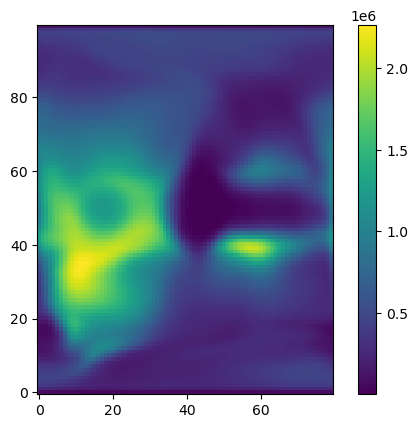

In [114]:
plt.imshow(f['data']['edens'][429,:,alt_idx,:].T, origin='lower')
plt.colorbar()
plt.show()
plt.close()

In [115]:
len(f['data']['edens'][429,:,alt_idx,:].flatten())

8000

In [116]:
x, y, z = interp_one_map(f['grid']['glon'][:,:,alt_idx].flatten(), f['grid']['glat'][:,:,alt_idx].flatten(),
                         f['data']['edens'][429,:,alt_idx,:].flatten())

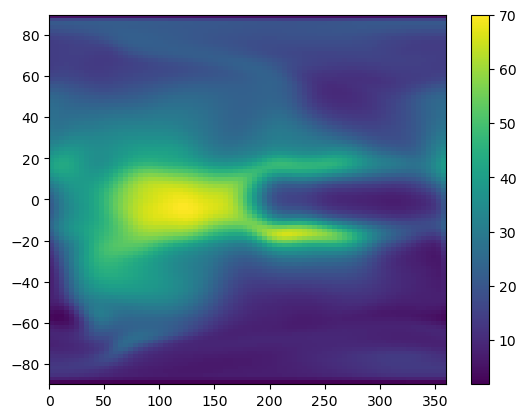

In [117]:
plt.imshow(f['data']['tec'][429,:,:].T, origin = 'lower',
           extent = [0,360,-90,90], aspect = 'auto')
plt.colorbar()
plt.show()
plt.close()

In [118]:
tecfits = make_fits(f['data']['tec'])
tecdiffs = (f['data']['tec'] - tecfits)

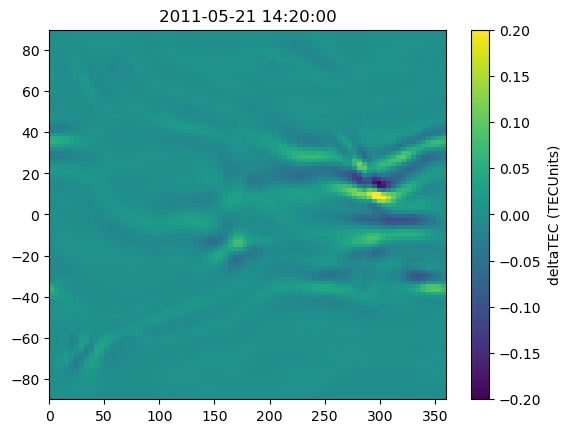

In [131]:
ntectime = 460

plt.imshow(tecdiffs[ntectime,:,:].T, origin = 'lower',
           extent = [0,360,-90,90], aspect = 'auto', vmin = -0.2, vmax = 0.2)
plt.colorbar(label = 'deltaTEC (TECUnits)')
plt.title(tectimes[ntectime])
plt.show()
plt.close()